In [23]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 111.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!chmod 600 /content/kaggle.json

In [4]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d aryashah2k/mango-leaf-disease-dataset

mango-leaf-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet
import zipfile

In [7]:
zip_source = '//content/mango-leaf-disease-dataset.zip'
extract_destination = '/content/dataset/manggo'

with zipfile.ZipFile(zip_source, 'r') as zip_ref:
  zip_ref.extractall(extract_destination)
  zip_ref.close()

In [8]:
dataset_dir = '/content/dataset/manggo'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [9]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

In [10]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 75, 75, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 75, 75, 32)       128       
 ation)                                         

In [11]:
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(1e-4),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 128)               2097280   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 5,334,920
Trainable params: 2,106,056
Non-trainable params: 3,228,864
______________________________________

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=20,
    validation_data=val_generator,
    validation_steps=8
)

Epoch 1/20
8/8 [==============================] - 21s 2s/step - loss: 1.7169 - accuracy: 0.4492 - val_loss: 1.0696 - val_accuracy: 0.6367
Epoch 2/20
8/8 [==============================] - 8s 1s/step - loss: 0.5625 - accuracy: 0.8203 - val_loss: 0.8359 - val_accuracy: 0.7031
Epoch 3/20
8/8 [==============================] - 9s 1s/step - loss: 0.4649 - accuracy: 0.8438 - val_loss: 0.4603 - val_accuracy: 0.8398
Epoch 4/20
8/8 [==============================] - 8s 1s/step - loss: 0.3528 - accuracy: 0.8672 - val_loss: 0.6586 - val_accuracy: 0.7930
Epoch 5/20
8/8 [==============================] - 8s 1s/step - loss: 0.2345 - accuracy: 0.9375 - val_loss: 0.3506 - val_accuracy: 0.8867
Epoch 6/20
8/8 [==============================] - 12s 2s/step - loss: 0.2006 - accuracy: 0.9375 - val_loss: 0.5096 - val_accuracy: 0.8203
Epoch 7/20
8/8 [==============================] - 15s 2s/step - loss: 0.1519 - accuracy: 0.9648 - val_loss: 0.3736 - val_accuracy: 0.8789
Epoch 8/20
8/8 [======================

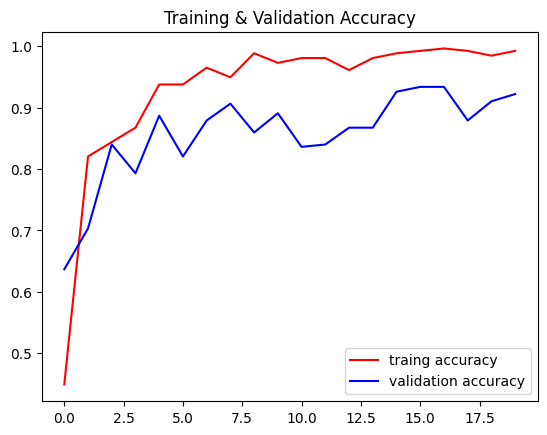

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='traing accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training & Validation Accuracy')
plt.legend(loc='best')
plt.figure()
plt.show()

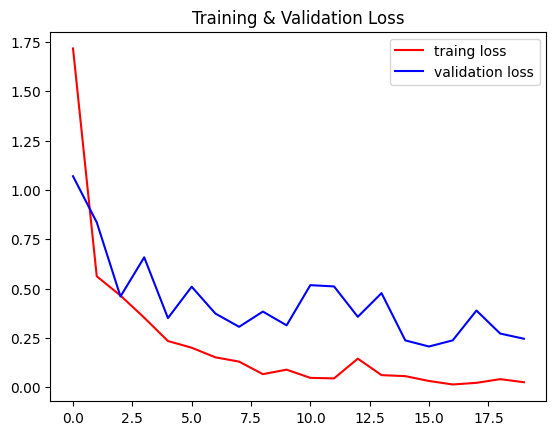

<Figure size 640x480 with 0 Axes>

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='traing loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training & Validation Loss')
plt.legend(loc='best')
plt.figure()
plt.show()

In [17]:
print(tf.__version__)

2.12.0


In [20]:
model.save('model_manggo.h5')

In [22]:
model_path = '/content/model_manggo.h5'
!tensorflowjs_converter --input_format=keras {model_path} ./

2023-06-04 13:23:55.662366: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
